In [20]:
import pandas as pd
import numpy as np      
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split    
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [7]:
data = pd.read_csv(r'C:\Users\mahdi\Desktop\Github\Cancer_Classification_Model\cleaned_data.csv')
data.head()



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [8]:
rs = 123 

In [9]:
x = data.drop(columns=['diagnosis'])
y = data['diagnosis']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state = rs)

In [12]:
print(f"Training dataset shape, X_train: {X_train.shape}, y_train: {y_train.shape}")

Training dataset shape, X_train: (455, 30), y_train: (455,)


In [13]:
print(f"Testing dataset shape, X_test: {X_test.shape}, y_test: {y_test.shape}")

Testing dataset shape, X_test: (114, 30), y_test: (114,)


In [15]:
penalty = "l2"
solver = 'lbfgs'
C = 1.0
max_iter = 1000

In [16]:
l2_model = LogisticRegression(penalty=penalty, solver=solver, C=C, max_iter=max_iter, random_state=rs)
l2_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=123)

In [17]:
l2_preds = l2_model.predict(X_test)

In [18]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['praecision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [21]:
evaluate_metrics(y_test, l2_preds)

{'accuracy': 0.9736842105263158,
 'recall': array([0.97222222, 0.97619048]),
 'praecision': array([0.98591549, 0.95348837]),
 'f1score': array([0.97902098, 0.96470588])}

In [23]:
penalty = "l1"
solver = 'liblinear'
c = 1.0
max_iter = 1000 
l1_model = LogisticRegression(penalty=penalty, solver=solver, C=C, max_iter=max_iter, random_state=rs)
l1_model.fit(X_train, y_train)
l1_preds = l1_model.predict(X_test)
evaluate_metrics(y_test, l1_preds)


{'accuracy': 0.9649122807017544,
 'recall': array([0.95833333, 0.97619048]),
 'praecision': array([0.98571429, 0.93181818]),
 'f1score': array([0.97183099, 0.95348837])}

### GridSearch

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [100,200 , 500,  1000]
}

In [26]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\mahdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mahdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mahdi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-pac

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

In [27]:
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Test Accuracy: 0.9736842105263158


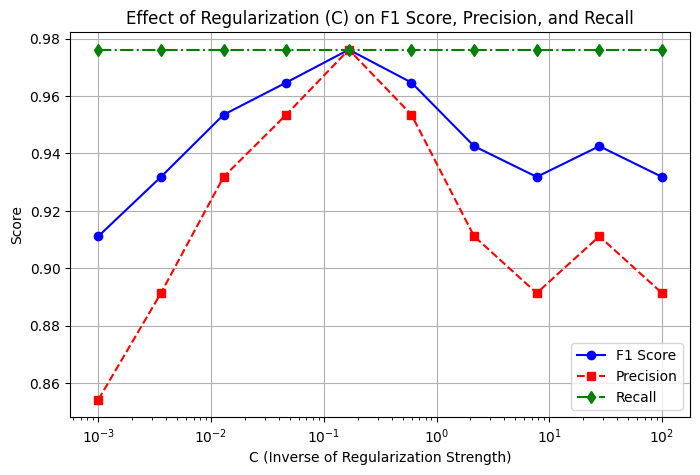

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score
C_values = np.logspace(-3, 2, 10)  # Values from 0.001 to 100
f1_scores = []
precision_scores = []
recall_scores = []

for C in C_values:
    model = LogisticRegression(C=C, solver='liblinear', max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))


plt.figure(figsize=(8, 5))
plt.plot(C_values, f1_scores, marker='o', linestyle='-', color='b', label="F1 Score")
plt.plot(C_values, precision_scores, marker='s', linestyle='--', color='r', label="Precision")
plt.plot(C_values, recall_scores, marker='d', linestyle='-.', color='g', label="Recall")

plt.xscale("log") 
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Score")
plt.title("Effect of Regularization (C) on F1 Score, Precision, and Recall")
plt.legend()
plt.grid(True)
plt.show()

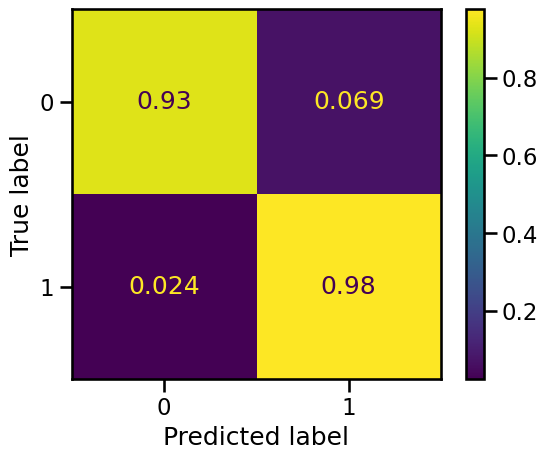

In [32]:
cf = confusion_matrix(y_test, y_pred, normalize='true')

sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=best_model.classes_)
disp.plot()
plt.show()